# Etapas:
1.   **Conversão de Dicom (.dcm) para .jpg**
2.   **Extração de Características:**
        *   dataset_raiox_features_adjusted.csv
            *   **FEATURE1** = Histograma de Cor
            *   **FEATURE2** = Haralick
            *   **FEATURE3** = LBP
            *   **FEATURE4** = Zernike
            *   **FEATURE5** = Combinação HUmoment **+** Haralick **+** Histograma de Cor
        *   dataset_texture_features_raiox.csv
            *   **FEATURE1** = FOS
            *   **FEATURE2** = GLCM
            *   **FEATURE3** = GLDS
            *   **FEATURE4** = NGTDM
            *   **FEATURE5** = SFM
            *   **FEATURE6** = LTE
            *   **FEATURE7** = FPS
            *   **FEATURE8** = LBP
            *   **FEATURE9** = LPQ
            *   **FEATURE10** = HUMoments
            *   **FEATURE11** = FOS + GLCM + GLDS + NGTDM + SFM + LTE + FPS
            *   **FEATURE12** = FOS + GLCM + GLDS + NGTDM + SFM + LTE + FPS + LBP + LPQ + HUMoments
        *   kaggle_combination_dataset_texture_feature.csv
        *   ribeirao_combination_dataset_texture_features_raiox.csv
            *   **FEATURE1** = FOS
            *   **FEATURE2** = GLCM
            *   **FEATURE3** = NGTDM
            *   **FEATURE4** = LPQ
            *   **FEATURE5** = FOS + GLCM
            *   **FEATURE6** = FOS + NGTDM
            *   **FEATURE7** = FOS + LPQ
            *   **FEATURE8** = GLCM + NGTDM
            *   **FEATURE9** = GLCM + LPQ
            *   **FEATURE10** = NGTDM + LPQ
            *   **FEATURE11** = FOS + GLCM + NGTDM
            *   **FEATURE12** = FOS + GLCM + LPQ
            *   **FEATURE13** = FOS + NGTDM + LPQ
            *   **FEATURE14** = GLCM + NGTDM + LPQ
3.   **Descrição dos dados (Dataset Ribeirão Preto):**
    *   190 imagens COVID
    *   310 imagens INTERSTICIAIS-NÃO-COVID
    *   381 imagens NORMAIS

3.   **Descrição dos dados (Dataset Kaggle)**
    *   250 imagens COVID
    *   250 imagens NORMAIS
    *   250 imagens viral_pneumonia    
    *   250 imagens lung_infection

4.   **Formato do CSV:**

|Índice|Imagem|Feature1|Feature2|Feature3|...|FeatureN|Category|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|0|1.jpg|list [...]|list [...]|list [...]|...|list [...]|Class|

5.   **Dimensionalidade dos dados:**

*  dataset_raiox_features_adjusted.csv

|Feature1|Feature2|Feature3|Feature4|Feature5|
|:--:|:--:|:--:|:--:|:--:|
|512|13|108|36|536|

*  dataset_texture_features_raiox.csv
*  kaggle_dataset_texture_features_raiox.csv

|Feature1|Feature2|Feature3|Feature4|Feature5|Feature6|Feature7|Feature8|Feature9|Feature10|Feature11|Feature12|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|16|28|5|5|4|6|2|59|256|11|66|381|

*  kaggle_combination_dataset_texture_feature.csv
*  ribeirao_combination_dataset_texture_features_raiox.csv

|Feature1|Feature2|Feature3|Feature4|Feature5|Feature6|Feature7|Feature8|Feature9|Feature10|Feature11|Feature12|Feature13|Feature14|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|16|28|5|255|44|21|271|33|283|260|49|299|276|288|

# Leitura dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Retorna os dados extraidos em formato de lista
def split_data(input, feature_name, size):
    image_ids = []
    image_features = []
    image_categories = []
    for i in range(size):
        x = [ float(v) for v in input.iloc[i][feature_name][1:-1].split(", ") ] #Inicialmente, os valores estavam sendo considerados como uma string. Portanto foi necessario remover os colchetes com o [1:-1] e fazer o split dos dados
        x = np.array(x)
        image_features.append(x)
        image_ids.append(input.iloc[i].Image)
        image_categories.append(input.iloc[i].Category)
    return image_ids, image_features, image_categories

In [2]:
#Leitura do Dataset
#input = pd.read_csv("dataset_raiox_features_initial.csv") #First Test
#input = pd.read_csv("dataset_raiox_features_adjusted.csv") #Second Test
#input = pd.read_csv("dataset_texture_features_raiox.csv") #Third Test
#input = pd.read_csv("kaggle_dataset_texture_features_raiox.csv") #Third Test
#input = pd.read_csv("kaggle_combination_dataset_texture_feature.csv") #Fourth Test
input = pd.read_csv("Kdataset_texture_features_raiox.csv") #Fifth Test

#Classes no dataset
print("\nDataset completo:")
print(input["Category"].value_counts())

#Obtendo os indices da classe a ser removida: lung_infection
idx = input.index[input['Category'] == "intersticiais-nao-covid"]
#Removendo instancias
input.drop(idx, inplace=True)

#print("\nDataset com 2 classes:")
print(input["Category"].value_counts())


Dataset completo:
Normal    10192
COVID      3616
Name: Category, dtype: int64
Normal    10192
COVID      3616
Name: Category, dtype: int64


In [3]:
#Atualizando indices (Removendo os 'furos' dos drops)
input = input.reset_index()
input = input.drop('index', axis=1)
input

,Image,Feature1,Feature2,Feature9,Category
0,COVID-1.png,"[146.4689912886442, 2695.8212765534017, 154.0,...","[0.002467471077144463, 21.680532862133305, 0.9...","[0.011263963470745146, 0.0020151661638458224, ...",COVID
1,COVID-10.png,"[141.90980098261832, 1657.0318399047858, 136.0...","[0.000838294741065049, 20.246959701198616, 0.9...","[0.0024694521776607763, 0.0014909899940593367,...",COVID
2,COVID-100.png,"[153.4780933932616, 5464.90643489497, 169.0, 0...","[0.0011980524963708938, 48.29546475626246, 0.9...","[0.03302309869654859, 0.0016074735873452225, 0...",COVID
3,COVID-1000.png,"[163.4093718739383, 5837.138458637468, 191.0, ...","[0.0012166146120079894, 46.90221837511844, 0.9...","[0.03604002376265303, 0.002352968584374891, 0....",COVID
4,COVID-1001.png,"[130.40015984380577, 4397.169889202145, 153.0,...","[0.0009456632789651284, 64.59982221133247, 0.9...","[0.08370511013523745, 0.002003517804517234, 0....",COVID
...,...,...,...,...,...
13803,Normal-9995.png,"[120.50611812694116, 5129.294658369091, 123.0,...","[0.0003855388905023442, 41.070454492600504, 0....","[0.04983168120770189, 0.001980221085860057, 0....",Normal
13804,Normal-9996.png,"[134.93284871358415, 3552.944194364588, 139.0,...","[0.0005401139051125521, 95.78528549585465, 0.9...","[0.0031450570187189133, 0.003098463581404559, ...",Normal
13805,Normal-9997.png,"[130.3557250204027, 5323.078817446623, 134.0, ...","[0.0005868878369518965, 20.694448868637828, 0....","[0.03993057577840161, 0.001351209682116274, 0....",Normal
13806,Normal-9998.png,"[157.41691427323155, 4013.4903841254586, 174.0...","[0.000979623118740701, 52.97509597779279, 0.99...","[0.002189891553774651, 0.0017705506179454625, ...",Normal


In [4]:
#Definindo as features e as funcoes de distancia
feature_names = ["Feature1", "Feature2","Feature9"] #[f for f in input.columns[1:-1]]
#distance_functions = ["euclidean", "cosine", "manhattan"] #Mesmas distancias: l1=manhattan=cityblock  e  l2=euclidean
seed = 42 #Semente de entrada para execucao das Tecnicas de Projecao Multidimensional
#distance_matrix_output = True #Ativa/Desativa a geracao dos arquivos contendo matrizes de dissimilaridade

#Numero de instancias do dataset
size = input.shape[0]
print("Total number of images: ", size)

print("\nDimensionality: ")
#Obtendo as features
image_ids = {}; image_features = {}; image_categories  = {};
for feature_name in feature_names:
    ids, features, categories = split_data(input, feature_name, size)
    print(feature_name, len(features[0]))
    image_ids[feature_name] = ids
    image_features[feature_name] = features
    image_categories[feature_name] = categories

Total number of images:  13808

Dimensionality: 
Feature1 16
Feature2 28
Feature9 255


# Classificação

**Oversample**: Balanceando o dataset utilizando a técnica de oversampling

In [5]:
# from imblearn.over_sampling import RandomOverSampler

# def oversample_imblearn(inputs, targets):
#     oversample = RandomOverSampler(sampling_strategy='minority')
#     oversampled_data, oversampled_targets = oversample.fit_resample(inputs, targets)
#     return oversampled_data, oversampled_targets

In [6]:
# oversampled_data, oversampled_targets = oversample_imblearn(inputs, targets)

# input["Category"].value_counts()
# print(Counter(targets))
# print(Counter(oversampled_targets))

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
"""
Funcao para classificacao do conjunto de dados passado
    inputs:     Variáveis de entrada (X)
    targets:    Variáveis alvo (y)
"""
def model_tester(inputs, targets, weights=None):
  results = {} #Armazena os resultados obtidos
  if isinstance(inputs, pd.core.frame.DataFrame):
    inputs = inputs.values
  if isinstance(targets, pd.core.frame.DataFrame) or isinstance(targets, pd.core.series.Series):
    targets = targets.values
  
  testes = {
    "Nearest Neighbors" :  KNeighborsClassifier(3),
    "SVM Linear" : SVC(kernel='linear', class_weight=weights),
    "SVM Polinomial grau 3" : SVC(kernel='poly', degree=3, class_weight=weights),
    "Decision Tree (gini)" : DecisionTreeClassifier(criterion='gini', class_weight=weights),
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Neural Net" : MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost" : AdaBoostClassifier(),
    "Naive Bayes" : GaussianNB()
  }

  for teste in testes:
    clf = testes[teste]
    scores = []    
    pre = []
    f1 = []
    rec = []
    skfold = StratifiedKFold(n_splits=10)
    for train_index, test_index in skfold.split(inputs, targets):
      X_train, X_test = inputs[train_index], inputs[test_index]
      y_train, y_test = targets[train_index], targets[test_index]
        
      # Sampling the data.
      #X_train, y_train = sampler_func(X_train, y_train)
      #y_train = y_train['Class'].to_numpy() 
      
      # Normalizing the data.
      scaler = MinMaxScaler().fit(X_train)
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)
      
      # Fitting and predictions.
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      scores.append(balanced_accuracy_score(y_test, y_pred))
      pre.append(average_precision_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      rec.append(recall_score(y_test, y_pred))
    
    avg_score = np.mean(scores)*100
    avg_pre = np.mean(pre)*100
    avg_f1 = np.mean(f1)*100
    avg_rec = np.mean(rec)*100
    results[teste] = avg_score
    print("----Score do classificador '%s': %.2f" % (teste, avg_score))
    print("----Precissão do classificador '%s': %.2f" % (teste, avg_pre))
    print("----F1 do classificador '%s': %.2f" % (teste, avg_f1))
    print("----Rec do classificador '%s': %.2f" % (teste, avg_rec))
    print("**************************************************************")
  return results

In [8]:
#Definindo um grafico de barras personalizado
def bar_chart(classifiers, scores, title, x_label, y_label, size, further_info=""):
  fig, ax = plt.subplots(figsize = size)
  plt.grid(b=bool, which='both', axis='y', color='r', linestyle='-', linewidth=0.1)
  ind = np.arange(len(classifiers))    # the x locations for the groups
  width = 0.8                          # the width of the bars
  rects = ax.bar(ind, scores, width, bottom=0, color='r', edgecolor='k') #yerr=std Desvio Padrao
  ax.set_title(title + further_info)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.set_xticks(ind)
  ax.set_xticklabels( classifiers,
                      rotation=40,
                      horizontalalignment='right')
  
  #Definindo as legendas acima de cada caixa do histograma
  #Attach a text label above each bar in *rects*, displaying its height.
  for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  #rotation=90,
                  ha='center',
                  va='bottom')

  #Definindo os limites da imagem
  bottom, top = plt.ylim()         # return the current ylim
  #plt.ylim((bottom, top + 3.5))   # set the ylim to bottom, top
  plt.ylim((bottom, 100 + 5.5))          # set the ylim to bottom, top

  ax.autoscale_view()
  plt.tight_layout()
    
  #Exportando a figura
  fig_name = title + further_info + '.png'
  plt.savefig(fig_name)

  plt.show()

#  **Classificação aplicada aos Dados Originais**

In [9]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')


results = [] #Armazena os resultados da classificacao para cada Feature
#Executando os classificadores para todas as features extraidas
for feature_name in feature_names:
    print("\nExecutando classificadores: feature_name=" + feature_name)
    X = pd.DataFrame(image_features[feature_name]) 
    target_classes = [x for x in input['Category'].unique()]
    y = input['Category'].factorize(target_classes)[0]
    
    X_over, y_over = undersample.fit_resample(X, y)
    
    result = model_tester(X_over, y_over)
    results.append(result)


Executando classificadores: feature_name=Feature1
----Score do classificador 'Nearest Neighbors': 84.78
----Precissão do classificador 'Nearest Neighbors': 78.85
----F1 do classificador 'Nearest Neighbors': 85.24
----Rec do classificador 'Nearest Neighbors': 87.83
**************************************************************
----Score do classificador 'SVM Linear': 67.90
----Precissão do classificador 'SVM Linear': 62.37
----F1 do classificador 'SVM Linear': 69.90
----Rec do classificador 'SVM Linear': 73.81
**************************************************************
----Score do classificador 'SVM Polinomial grau 3': 76.84
----Precissão do classificador 'SVM Polinomial grau 3': 70.55
----F1 do classificador 'SVM Polinomial grau 3': 77.48
----Rec do classificador 'SVM Polinomial grau 3': 79.31
**************************************************************
----Score do classificador 'Decision Tree (gini)': 81.01
----Precissão do classificador 'Decision Tree (gini)': 75.21
----F1 do

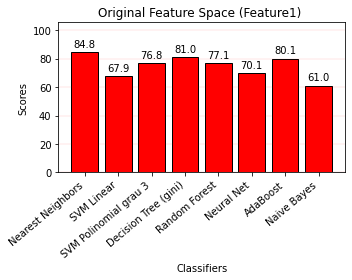

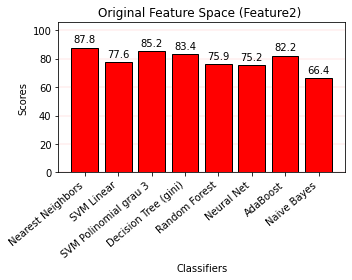

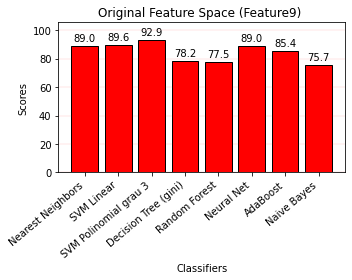

In [10]:
#Obtendo os scores dos classificadores
for idx, feature_name in enumerate(feature_names):
  classifiers = results[idx].keys()
  scores = [round(results[idx][i], 1) for i in classifiers]
  #print(feature_name, scores)
  further_info = " (" + feature_name + ") "
  bar_chart(classifiers, scores, 'Original Feature Space', 'Classifiers', 'Scores', (5,4), further_info)